# Knapsack Problem 🎒💰 
- you have a bag that has a weight capacity you can't exceed 
- you still want to take the most valuable items with you 
- What is the best solution ?
maximize the value 
constraint to the weight capacity 

In [245]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [229]:
# Knapsack problem parameters
# items = [("item1", 10, 5), ("item2", 20, 10), ("item3", 15, 8), ("item4", 25, 12)]  # (name, weight, value)
# items = [("item1", 10, 5), ("item2", 20, 10), ("item3", 15, 8), ("item4", 25, 12),("item5", 30, 15), ("item6", 40, 20), ("item7", 35, 18), ("item8", 50, 25)]
num_items = 1000

items = [(f"item{i}", random.randint(1, 50), random.randint(1, 50)) for i in range(1, num_items + 1)]  # (name, weight, value)

knapsack_capacity = 100000

In [230]:
population_size = 50
num_generations = 1000
mutation_rate = 0.03

## initalization 

In [231]:
# initalize the population 
def initialize_population(population_size):
    return [[random.randint(0,1) for _ in range(len(items))] for i in range(population_size)]

## Fitness function

In [232]:
# calculate fitness 
def fitness(sol):
    total_weight, total_value = 0, 0
    for i in range(len(sol)):
        if sol[i] == 1:
            total_weight += items[i][1]
            total_value += items[i][2]
    if total_weight > knapsack_capacity:
        return 0
    else:
        return total_value

## Selection  

### Tourment selection 
- Use local information from the fitness function 
- Relative fitness rather than absolute 
1. Pick K members randomly 
2. Select the Best member 
3. Repeat untill you reach the number of parents you want 

In [233]:
def select_parents(pop, tournament_size):
    mate_pool = []
    for _ in range(2):
        tournament = random.sample(pop, tournament_size)
        best_fitness = max([fitness(sol) for sol in tournament])
        best_sol = [sol for sol in tournament  if fitness(sol) == best_fitness ][0] #[[one element]][0]
        mate_pool.append(best_sol)
    return mate_pool

## CrossOver 

In [234]:
def onePoint_crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

## Mutation

In [235]:
sol = [1,0,1,0]
[1-bit if random.random() < mutation_rate else bit for bit in sol]

[1, 0, 1, 0]

In [236]:
def mutate(sol):
    return [1-bit if random.random() < mutation_rate else bit for bit in sol]

## Genetic algorithm main function

In [237]:
def genetic_algorithm(population_size, num_generations):
    pop = initialize_population(population_size)
    for gen in range(num_generations):
        # parent selection 
        new_pop = []
        # Generate offspring
        for _ in range(population_size//2):
            parent1, parent2 = select_parents(pop, tournament_size=5)
            child1, child2 = onePoint_crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_pop.extend([child1, child2])
        pop = new_pop
        best_solution = max(pop, key=fitness)
        best_fitness = fitness(best_solution)
        print(f"Generation {gen + 1}: Best Fitness = {best_fitness}")
    return best_solution

In [238]:
# Run the genetic algorithm
best_solution = genetic_algorithm(population_size, num_generations)
print("Best Solution:", best_solution)

Generation 1: Best Fitness = 14477
Generation 2: Best Fitness = 14668
Generation 3: Best Fitness = 14932
Generation 4: Best Fitness = 15154
Generation 5: Best Fitness = 15502
Generation 6: Best Fitness = 15658
Generation 7: Best Fitness = 15725
Generation 8: Best Fitness = 15990
Generation 9: Best Fitness = 16036
Generation 10: Best Fitness = 16448
Generation 11: Best Fitness = 16678
Generation 12: Best Fitness = 16849
Generation 13: Best Fitness = 16702
Generation 14: Best Fitness = 16804
Generation 15: Best Fitness = 16983
Generation 16: Best Fitness = 17078
Generation 17: Best Fitness = 17147
Generation 18: Best Fitness = 17152
Generation 19: Best Fitness = 17232
Generation 20: Best Fitness = 17455
Generation 21: Best Fitness = 17483
Generation 22: Best Fitness = 17513
Generation 23: Best Fitness = 17581
Generation 24: Best Fitness = 17462
Generation 25: Best Fitness = 17760
Generation 26: Best Fitness = 17833
Generation 27: Best Fitness = 17848
Generation 28: Best Fitness = 17774
G

# With OOP 

In [239]:
class Item:
    def __init__(self, name, value, weight) -> None:
        self.name = name
        self.value = value 
        self.weight = weight
class knapsack_bag:
    def __init__(self,capacity, items) -> None:
        self.capacity = capacity
        self.items = items


In [240]:
class knapsack_EA:
    def __init__(self, knapsack_bag, pop_size, generations, mutation_rate, tournament_size) -> None:
        self.pop_size = pop_size
        self.knapsack_bag = knapsack_bag
        self.pop_size = pop_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.pop = self.pop_init()
        self.tournament_size = tournament_size
    # initalization 
    def pop_init(self):
        return [[random.randint(0,1) for _ in range(len(self.knapsack_bag.items))] for i in range(self.pop_size)]
    # Fitness 
    def fitness(self, sol):
        total_value , total_weight = 0, 0
        for i in range(len(sol)):
            if sol[i] == 1:
                total_value += self.knapsack_bag.items[i].value 
                total_weight += self.knapsack_bag.items[i].weight 
        if total_weight > self.knapsack_bag.capacity:
            return 0
        else : 
            return total_value
    # Parent Selection 
    # Tournmant selection
    def parent_select(self, num_parents_selected=None):
        if num_parents_selected is None:
            num_parents_selected = self.tournament_size
        parents = []
        for i in range(2):
            tournmant = random.sample(self.pop, num_parents_selected)
            best_member = max(tournmant, key=self.fitness)
            parents.append(best_member)
            # best_fitness = self.fitness(best_member)
        return parents
    # CrossOver
    def crossover(self, parent1, parent2, type="one-point"):
        if type == "one-point":
            point = random.randint(1, len(parent1)-1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
            return child1, child2
    # Mutation 
    def mutate(self, sol):
        return [bit-1 if random.random() < self.mutation_rate else bit for bit in sol]
    # Solve 
    def solve(self, printable=False, printSteps=1):
        history = []
        for gen in range(self.generations):
            new_pop = []
            # survival controling loop 
            # each generation the population size decrease by 1/2
            for _ in range(self.pop_size //2):
                parent1, parent2 = self.parent_select()
                child1, child2 = self.crossover(parent1, parent2)
                child1, child2 = mutate(child1), mutate(child2)
                new_pop.extend([child1, child2])
            # change the old population with the current generation population 
            self.pop = new_pop
            best_solution = max(self.pop, key=self.fitness)
            best_fitness = self.fitness(best_solution)
            history.append(best_fitness)
            if printable:
                if gen % printSteps == 0 :
                    print(f"Generation {gen+1} : Best Fitness {best_fitness} For {best_solution}")
        return history
            

In [273]:
# items for the bag 
numOfItmes = 100
items = [Item(f"item{i}", random.randint(1, 50), random.randint(1,50)) for i in range(numOfItmes)]
for i in range(len(items)):
    print(items[i].__getstate__())

{'name': 'item0', 'value': 18, 'weight': 36}
{'name': 'item1', 'value': 40, 'weight': 41}
{'name': 'item2', 'value': 18, 'weight': 39}
{'name': 'item3', 'value': 23, 'weight': 43}
{'name': 'item4', 'value': 4, 'weight': 36}
{'name': 'item5', 'value': 26, 'weight': 37}
{'name': 'item6', 'value': 44, 'weight': 26}
{'name': 'item7', 'value': 23, 'weight': 9}
{'name': 'item8', 'value': 43, 'weight': 35}
{'name': 'item9', 'value': 13, 'weight': 50}
{'name': 'item10', 'value': 1, 'weight': 41}
{'name': 'item11', 'value': 35, 'weight': 5}
{'name': 'item12', 'value': 19, 'weight': 19}
{'name': 'item13', 'value': 33, 'weight': 41}
{'name': 'item14', 'value': 30, 'weight': 38}
{'name': 'item15', 'value': 13, 'weight': 45}
{'name': 'item16', 'value': 37, 'weight': 49}
{'name': 'item17', 'value': 1, 'weight': 42}
{'name': 'item18', 'value': 26, 'weight': 5}
{'name': 'item19', 'value': 39, 'weight': 24}
{'name': 'item20', 'value': 14, 'weight': 20}
{'name': 'item21', 'value': 40, 'weight': 42}
{'na

In [274]:
# knapsack bag 
# Define knapsack capacity
knapsack_capacity = 1000

# Create a knapsack instance
bag = knapsack_bag(knapsack_capacity, items)

In [290]:
# Define genetic algorithm parameters
pop_size = 50
generations = 200
mutation_rate = 0.01
tournament_size = 5

# Create a knapsack EA instance
knapsack_ea = knapsack_EA(bag, pop_size, generations, mutation_rate, tournament_size)

# Solve the problem
history = knapsack_ea.solve(printable=True, printSteps=10)

# Print the final history
print("Final History:", history)


Generation 1 : Best Fitness 1038 For [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
Generation 11 : Best Fitness 1259 For [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
Generation 21 : Best Fitness 1490 For [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

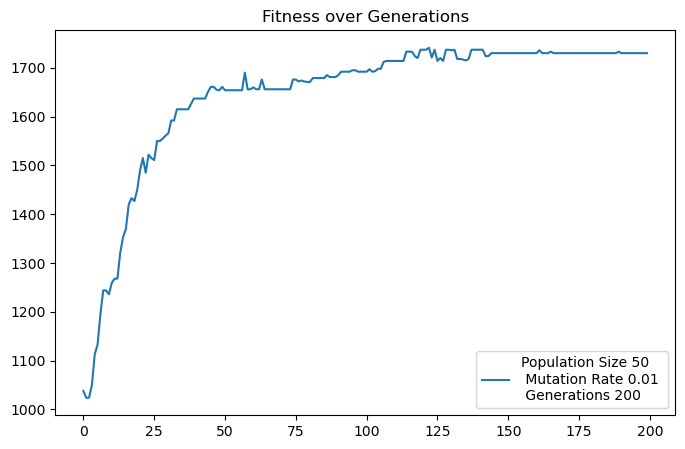

In [291]:
plt.figure(figsize=(8, 5))
X = np.arange(generations)
plt.plot(X, history)
plt.title(f"Fitness over Generations")
plt.legend([
    f"Population Size {population_size} \n Mutation Rate {mutation_rate} \n Generations {generations}", 
   
    ])
plt.show()

Final History: [0, 0, 0, 0, 1147, 1194, 1230, 1274, 1314, 1314, 1314, 1326, 1332, 1367, 1409, 1454, 1454, 1459, 1482, 1508, 1510, 1510, 1517, 1537, 1582, 1606, 1620, 1620, 1620, 1620, 1620, 1640, 1640, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1657, 1681, 1681, 1681, 1681, 1687, 1687, 1687, 1687, 1687, 1687, 1697, 1697, 1702, 1702, 1702, 1702, 1702, 1702, 1702, 1702, 1702, 1702, 1707, 1707, 1707, 1707, 1707, 1707, 1709, 1709, 1722, 1722, 1722, 1722, 1722, 1722, 1722, 1723, 1723, 1723, 1736, 1736, 1736, 1736, 1736, 1736, 1736, 1740, 1740, 1740, 1740, 1740, 1745, 1745, 1745, 1760, 1760, 1760, 1760, 1760, 1760, 1760, 1760, 1760, 1768, 1774, 1774, 1774, 1774, 1774, 1774, 1774, 1774, 1774, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 1784, 

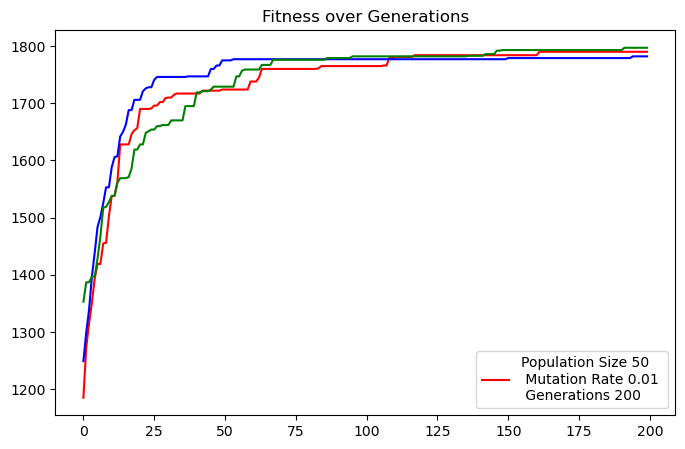

In [307]:
# Create a knapsack EA instance
# tournament size is same size as the whole population 
# just like taking all the population to be the sample meaning you will select always the best to crossover 
mutation_rate = 0.01
knapsack_ea2 = knapsack_EA(bag, pop_size, generations, mutation_rate, tournament_size=pop_size)
knapsack_ea3 = knapsack_EA(bag, pop_size, generations, mutation_rate, tournament_size=pop_size//2)
knapsack_ea4 = knapsack_EA(bag, pop_size, generations, mutation_rate, tournament_size=pop_size//3)

# Solve the problem
history2 = knapsack_ea2.solve()
history3 = knapsack_ea3.solve()
history4 = knapsack_ea4.solve()

# Print the final history
print("Final History:", history)
plt.figure(figsize=(8, 5))
X = np.arange(generations)
plt.plot(X, history2, c='red')
plt.plot(X, history3, c='blue')
plt.plot(X, history4, c='green')


plt.title(f"Fitness over Generations")
plt.legend([
    f"Population Size {population_size} \n Mutation Rate {mutation_rate} \n Generations {generations}", 
   
    ])
plt.show()